Carga de las librerías a utilizar en el Notebook

In [1]:
# Básicas para el trabajo de los datos
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

# Estimadores Clasificación
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

# Métricas del modelo
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# Cross Validation
from sklearn.model_selection import train_test_split

# Para graficar la informmación
from pandas import Series, DataFrame
import matplotlib as mpl
import seaborn as sns 
%matplotlib inline

# Asignación del tamaño por defecto de la figura
mpl.rcParams['figure.figsize'] = (10.0, 8.0)

# Carga lo necesario para el proceso de discreción
from sklearn.preprocessing import KBinsDiscretizer

Carga de la información para ser utilizado con el set de datos del proyecto

In [2]:
# Carga el archivo csv dentro de Python
booking = pd.read_csv('hotel_bookings.csv') #, header =1)
# Ver una parte de la información del data set cargado
print('***** Parte de la información a procesar *****')
print(booking.head())
# Ver la composición de los datos del data set
print('***** Composición de los datos del Data Set *****')
print(booking.describe())

***** Parte de la información a procesar *****
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0            

In [3]:
# Verificación de los tipos de datos de las variables
print('***** Tipos de datos del Data Set *****')
booking.info()

***** Tipos de datos del Data Set *****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
di

Estimación de la Covarianza en el Data Set y la matriz de correlación

In [4]:
# Cálculo de la covarianza para el Data Set
covMat = booking.cov()
print('***** Matriz de Covarianza Data Set *****')
print(covMat)

***** Matriz de Covarianza Data Set *****
                                is_canceled     lead_time  arrival_date_year  \
is_canceled                        0.233210     15.126964           0.005692   
lead_time                         15.126964  11419.721511           3.034866   
arrival_date_year                  0.005692      3.034866           0.500522   
arrival_date_week_number           0.053534    184.455853          -5.203069   
arrival_date_day_of_month         -0.025994      2.127750          -0.001373   
stays_in_weekend_nights           -0.000864      9.142389           0.015188   
stays_in_week_nights               0.022822     33.810687           0.041694   
adults                             0.016789      7.398401           0.012145   
children                           0.000972     -1.602367           0.015402   
babies                            -0.001529     -0.217774          -0.000909   
is_repeated_guest                 -0.007197     -2.336794           0.001286  

In [5]:
# Creación de una matriz de correlación básica con pandas
corrMat = booking.corr()
print('***** Matriz de Correlación del Data Set *****')
print(corrMat)

***** Matriz de Correlación del Data Set *****
                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.005048  -0.037622           0.054624   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations       

Análisis Exploratorio de los Datos

In [6]:
# Cantidad de reservaciones por año de arribo
print('***** Cantidad de Reservaciones por Año de Arribo *****')
booking.groupby('arrival_date_year')['arrival_date_year'].count()

***** Cantidad de Reservaciones por Año de Arrivo *****


arrival_date_year
2015    21996
2016    56707
2017    40687
Name: arrival_date_year, dtype: int64

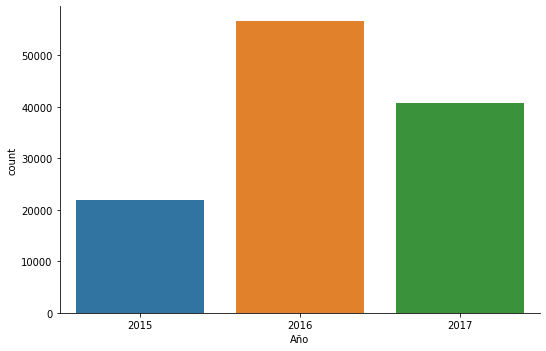

In [7]:
# Se grafica la cantidad de reservaciones por año
fg = sns.catplot('arrival_date_year', data=booking, kind='count', aspect=1.5)
fg.set_xlabels('Año')

Las reservaciones del 2015 son un 18% del total, las del 2016 son un 47% y las del 2017 son un 34%

In [8]:
# Cantidad de reservaciones por tipo de hotel y año
booking.groupby(['arrival_date_year', 'hotel'])['arrival_date_year'].count()

arrival_date_year  hotel       
2015               City Hotel      13682
                   Resort Hotel     8314
2016               City Hotel      38140
                   Resort Hotel    18567
2017               City Hotel      27508
                   Resort Hotel    13179
Name: arrival_date_year, dtype: int64

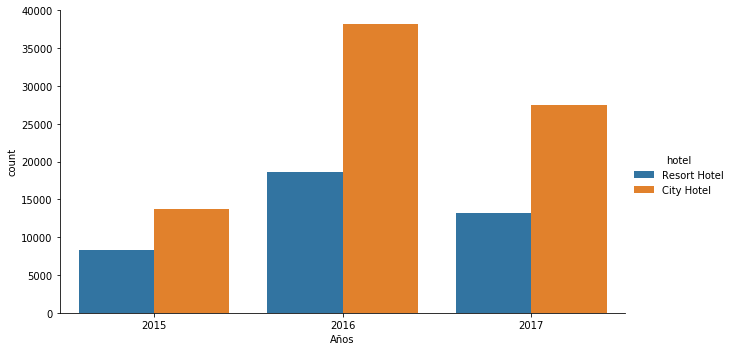

In [9]:
# Se grafican los resultados anteriores
g = sns.catplot('arrival_date_year', data=booking, hue='hotel', kind='count', aspect=1.75)
g.set_xlabels('Años')

Para el año 2015 62% fueron hoteles urbanos y 38% turísticos. 
Para el año 2016 tenemos 67% y 33% respectivamente. 
Para el año 2017 son 68% y 32%. 
Se puede considerar que aumenta la predilección por el hotel urbano, aunque de manera leve

In [10]:
# Cantidad de reservaciones por tipo de hotel
print('***** Cantidad de Reservaciones por Tipo de Hotel *****')
booking.groupby('hotel')['hotel'].count()

***** Cantidad de Reservaciones por Tipo de Hotel *****


hotel
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

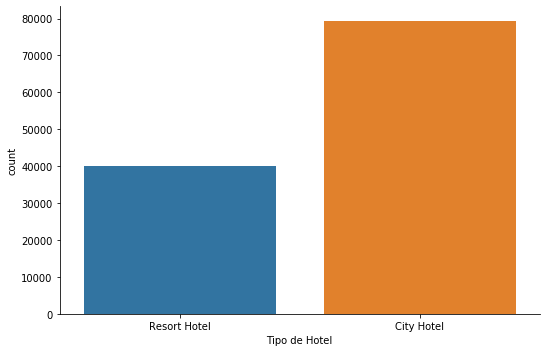

In [11]:
# Se grafica la cantidad de reservaciones por tipo de hotel
fg = sns.catplot('hotel', data=booking, kind='count', aspect=1.5)
fg.set_xlabels('Tipo de Hotel')

El hotel urbano representa un 66 del total de las reservaciones y el turístico un 34%, una relación de 2/3 a 1/3

Revisión de las cancelaciones

In [12]:
# Cantidad de reservaciones canceladas y no canceladas
print('***** Cantidad de Reservaciones no canceladas y canceladas *****')
booking.groupby('is_canceled')['is_canceled'].count()

***** Cantidad de Reservaciones no canceladas y canceladas *****


is_canceled
0    75166
1    44224
Name: is_canceled, dtype: int64

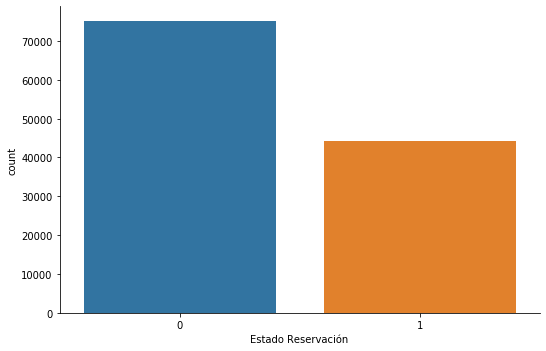

In [13]:
# Se grafica la cantidad de reservaciones por año
fg = sns.catplot('is_canceled', data=booking, kind='count', aspect=1.5)
fg.set_xlabels('Estado Reservación')

En general, las cancelaciones son un 37% del total de las reservaciones que fueron realizadas

In [14]:
# Estado de la reservación según el tipo de hotel
print('***** Estado de la reservación según el tipo de hotel *****')
booking.groupby(['hotel', 'is_canceled'])['hotel'].count()

***** Estado de la reservación según el tipo de hotel *****


hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28938
              1              11122
Name: hotel, dtype: int64

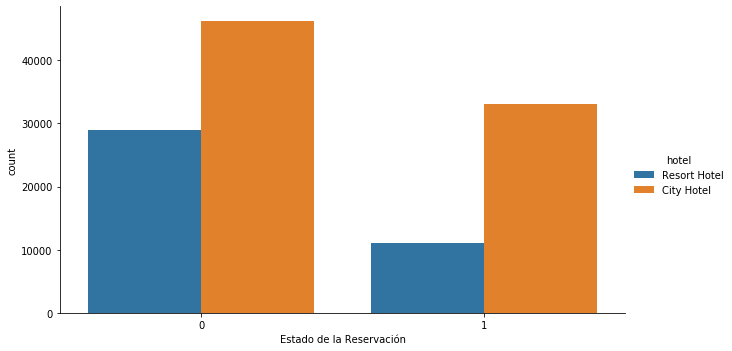

In [15]:
# Se grafican los resultados anteriores
g = sns.catplot('is_canceled', data=booking, hue='hotel', kind='count', aspect=1.75)
g.set_xlabels('Estado de la Reservación')

Los hoteles urbanos tienen un 42% de cancelación de sus reservaciones, mientras que los turísticos las cancelaciones son un 28% del total de las reservacions

In [16]:
# Ajuste de los valores del tipo de comida reservada
print(booking['meal'].unique())
booking['meal'] = np.where(booking['meal'] == 'Undefined', 'SC', booking['meal'])
print(booking['meal'].unique())

['BB' 'FB' 'HB' 'SC' 'Undefined']
['BB' 'FB' 'HB' 'SC']


In [17]:
# Estado de la reservación según el tipo de comida reservada
print('***** Estado de la reservación según el tipo de comida reservada *****')
booking.groupby(['meal', 'is_canceled'])['meal'].count()

***** Estado de la reservación según el tipo de comida reservada *****


meal  is_canceled
BB    0              57800
      1              34510
FB    0                320
      1                478
HB    0               9479
      1               4984
SC    0               7567
      1               4252
Name: meal, dtype: int64

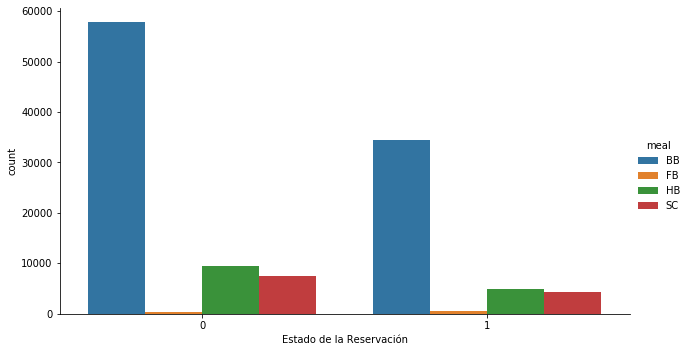

In [18]:
# Se grafican los resultados anteriores
g = sns.catplot('is_canceled', data=booking, hue='meal', kind='count', aspect=1.75)
g.set_xlabels('Estado de la Reservación')

Cuando se reserva con desayuno (BB) el porcentaje de cancelaciones es un 37%. 
Cuando se reserva con desayuno y una comida más (HB) las cancelaciones son un 34%. 
Cuando se reserva con todos los tiempos de comida (FB) las cancelaciones son un 60%. 
Cuando la reservacion no incluye las comidas (SC) las cancelaciones son un 36%. 
Con excepción de la reservación con todas las comidas, todas las cancelaciones tiene un comportamiento semejante.

Proceso para dividir los días entre la fecha de reservación y la fecha de llegada en 5 tractos:
de 0 a 147, 148 a 295, de 296 a 443, de 444 a 591 y de 592 a 737 días

In [19]:
# Ajusta el dato de los días por rangos
DAY_dis = KBinsDiscretizer(n_bins = 5, encode='ordinal', strategy = "kmeans").fit_transform(booking[['lead_time']])
DAY_dis = pd.DataFrame(DAY_dis).astype(int)
DAY_dis = DAY_dis.rename(columns = {0: 'lead_time'})
booking[['lead_time']] = DAY_dis

In [20]:
# Estado de la reservación según la cantidad de días x rango
print('***** Estado de la reservación según la cantidad de días x rango *****')
booking.groupby(['lead_time', 'is_canceled'])['lead_time'].count()

***** Estado de la reservación según la cantidad de días x rango *****


lead_time  is_canceled
0          0              40858
           1              12328
1          0              17333
           1              12430
2          0              11371
           1               9584
3          0               4586
           1               7752
4          0               1018
           1               2130
Name: lead_time, dtype: int64

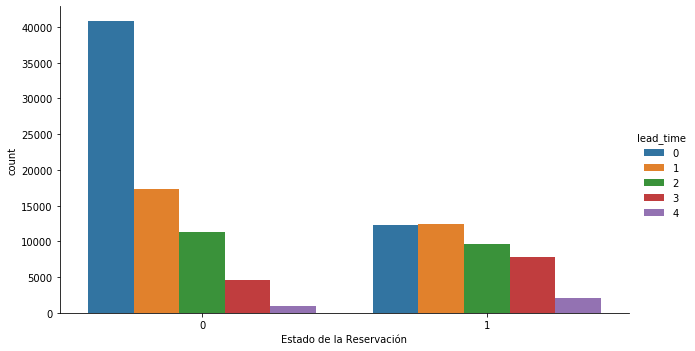

In [21]:
# Se grafican los resultados anteriores
g = sns.catplot('is_canceled', data=booking, hue='lead_time', kind='count', aspect=1.75)
g.set_xlabels('Estado de la Reservación')

Tenemos los siguientes porcentajes de cancelación de reservaciones según el rango de la cantidad de días:
0 a 147 => 23%
148 a 295 => 42%
296 a 443 => 46%
444 a 591 => 63%
592 a 737 => 68%
Entre más días de anticipación fue hecha la reservación, hay más posibilidad de que sea cancelada

In [24]:
### Estado de la reservación según el mes de arribo
print('***** Estado de la reservación según el mes de Arribo *****')
booking.groupby(['arrival_date_month', 'is_canceled'])['arrival_date_month'].count()

***** Estado de la reservación según el mes de arrivo *****


arrival_date_month  is_canceled
April               0              6565
                    1              4524
August              0              8638
                    1              5239
December            0              4409
                    1              2371
February            0              5372
                    1              2696
January             0              4122
                    1              1807
July                0              7919
                    1              4742
June                0              6404
                    1              4535
March               0              6645
                    1              3149
May                 0              7114
                    1              4677
November            0              4672
                    1              2122
October             0              6914
                    1              4246
September           0              6392
                    1              4116
Name: ar

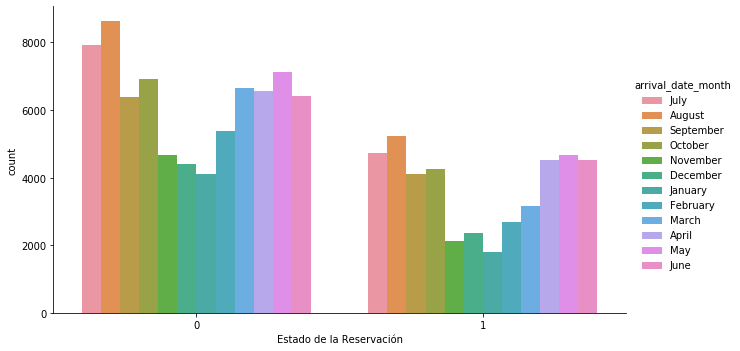

In [23]:
# Se grafican los resultados anteriores
g = sns.catplot('is_canceled', data=booking, hue='arrival_date_month', kind='count', aspect=1.75)
g.set_xlabels('Estado de la Reservación')

Según el mes de arribo en la reservación, el porcentaje de cancelaciones son:
Enero => 30% / 
Febrero => 33% / 
Marzo => 32% / 
Abril => 41% / 
Mayo => 40% / 
Junio => 41% / 
Julio => 37% / 
Agosto => 38% / 
Setiembre => 39% / 
Octubre => 38% /
Noviembre => 31% /
Diciembre => 35%

In [25]:
# Estado de la reservación según el segmento del mercado
print('***** Estado de la reservación según el segmento del mercado *****')
booking.groupby(['market_segment', 'is_canceled'])['market_segment'].count()

***** Estado de la reservación según el segmento del mercado *****


market_segment  is_canceled
Aviation        0                185
                1                 52
Complementary   0                646
                1                 97
Corporate       0               4303
                1                992
Direct          0              10672
                1               1934
Groups          0               7714
                1              12097
Offline TA/TO   0              15908
                1               8311
Online TA       0              35738
                1              20739
Undefined       1                  2
Name: market_segment, dtype: int64

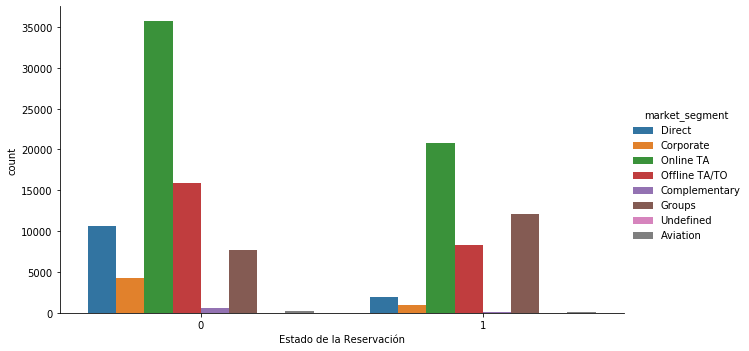

In [26]:
# Se grafican los resultados anteriores
g = sns.catplot('is_canceled', data=booking, hue='market_segment', kind='count', aspect=1.75)
g.set_xlabels('Estado de la Reservación')

In [27]:
# Estado de la reservación según el canal de distribución
print('***** Estado de la reservación según el canal de distribución *****')
booking.groupby(['distribution_channel', 'is_canceled'])['distribution_channel'].count()

***** Estado de la reservación según el canal de distribución *****


distribution_channel  is_canceled
Corporate             0               5203
                      1               1474
Direct                0              12088
                      1               2557
GDS                   0                156
                      1                 37
TA/TO                 0              57718
                      1              40152
Undefined             0                  1
                      1                  4
Name: distribution_channel, dtype: int64

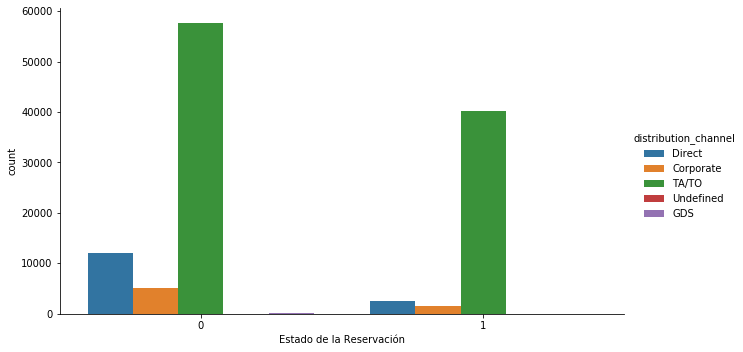

In [28]:
# Se grafican los resultados anteriores
g = sns.catplot('is_canceled', data=booking, hue='distribution_channel', kind='count', aspect=1.75)
g.set_xlabels('Estado de la Reservación')

Según el canal de distribución, tenemos los siguientes porcentajes de cancelación:
Corporativo => 22% / 
Directo => 17%
GDS => 19%
Agente de Viaje/Tour Operador => 41%

In [29]:
# Estado de la reservación según el tipo de depósito
print('***** Estado de la reservación según el tipo de depósito *****')
booking.groupby(['deposit_type', 'is_canceled'])['deposit_type'].count()

***** Estado de la reservación según el tipo de depósito *****


deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    0                 93
              1              14494
Refundable    0                126
              1                 36
Name: deposit_type, dtype: int64

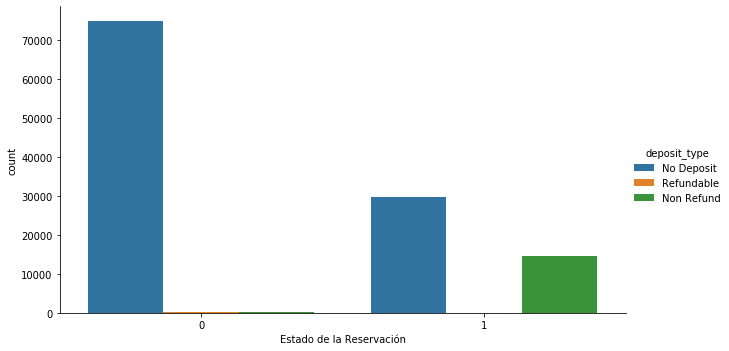

In [30]:
# Se grafican los resultados anteriores
g = sns.catplot('is_canceled', data=booking, hue='deposit_type', kind='count', aspect=1.75)
g.set_xlabels('Estado de la Reservación')

Según el tipo de depósito o pago, tenemos los siguientes porcentajes de cancelación:
Sin depósito => 28% / 
Pago total => 99%
Pago parcial => 22%

In [35]:
### Estado de la reservación según el tipo de cliente
print('***** Estado de la reservación según el tipo de cliente *****')
booking.groupby(['customer_type', 'is_canceled'])['customer_type'].count()

***** Estado de la reservación según el tipo de cliente *****


customer_type    is_canceled
Contract         0               2814
                 1               1262
Group            0                518
                 1                 59
Transient        0              53099
                 1              36514
Transient-Party  0              18735
                 1               6389
Name: customer_type, dtype: int64

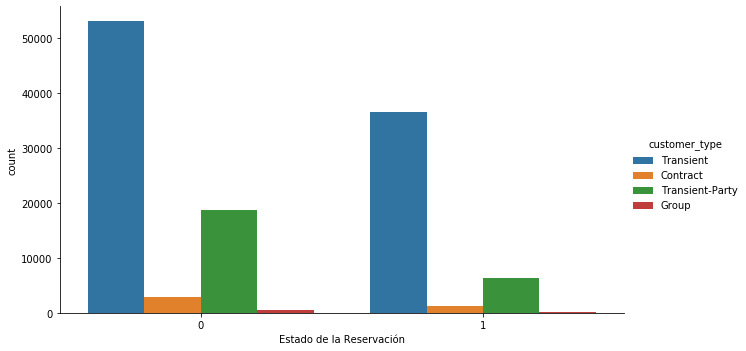

In [34]:
# Se grafican los resultados anteriores
g = sns.catplot('is_canceled', data=booking, hue='customer_type', kind='count', aspect=1.75)
g.set_xlabels('Estado de la Reservación')

Según el tipo de cliente, tenemos los siguientes resultados:
Con contrato asociado => 31% / 
Asociado a un grupo => 10% / 
Sin contrato o grupo asociado => 41% / 
Transitorio => 25%

Proceso para la estimación basada en clasificación

In [46]:
# Selección de las características
#features = credit.iloc[:,1:6]
features = booking.loc[:,['lead_time','stays_in_week_nights','adults','previous_cancellations','days_in_waiting_list','adr']]
print('Resumen de la muestra de las caracteríticas')
features.head()

Resumen de la muestra de las caracteríticas


,lead_time,stays_in_week_nights,adults,previous_cancellations,days_in_waiting_list,adr
0,3,0,2,0,0,0.0
1,4,0,2,0,0,0.0
2,0,1,1,0,0,75.0
3,0,1,1,0,0,75.0
4,0,2,2,0,0,98.0


In [47]:
# Seleccionar la variable ddependiente
depVar = booking['is_canceled']
print(depVar)

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 119390, dtype: int64


In [48]:
# Creación de los conjuntos de entrenamiento y pruebas (70/30)
X_train, X_test, y_train, y_test = train_test_split(features, depVar, train_size = 0.70, random_state = 123)
print('*** Cantidad de observaciones para entrenamiento(indepenientes): ', str(len(X_train)))
print(X_train.head())
print('*** El número de observaciones para entrenamiento(dependiente): ',str(len(y_train.index)))
print(y_train.head())

*** Cantidad de observaciones para entrenamiento(indepenientes):  83573
       lead_time  stays_in_week_nights  adults  previous_cancellations  \
74687          3                     1       2                       1   
9945           1                     1       2                       0   
55623          4                     2       2                       0   
83455          0                     1       1                       0   
61371          0                     3       2                       0   

       days_in_waiting_list    adr  
74687                     0   62.8  
9945                      0   42.0  
55623                     0   62.0  
83455                     0   79.0  
61371                     0  111.6  
*** El número de observaciones para entrenamiento(dependiente):  83573
74687    1
9945     1
55623    1
83455    0
61371    1
Name: is_canceled, dtype: int64


In [49]:
# Conjunto de pruebas (Testing)
print('*** Cantidad de observaciones para pruebas(indepenientes): ',str(len(X_test.index)))
print(X_test.head())
print('*** El número de observaciones para pruebas(dependiente): ',str(len(y_test.index)))
print(y_test.head())

*** Cantidad de observaciones para pruebas(indepenientes):  35817
       lead_time  stays_in_week_nights  adults  previous_cancellations  \
79204          0                     3       1                       0   
73022          1                     2       2                       0   
44658          1                     2       1                       0   
19217          1                     2       2                       1   
45223          0                     1       2                       0   

       days_in_waiting_list     adr  
79204                     0  134.25  
73022                     0  155.00  
44658                    50  108.00  
19217                     0   79.00  
45223                     0   75.00  
*** El número de observaciones para pruebas(dependiente):  35817
79204    0
73022    1
44658    0
19217    1
45223    1
Name: is_canceled, dtype: int64


In [50]:
#Definición para los modelos a utilizar
modelSVC = SVC()
modelRF = RandomForestClassifier()
modelRC = RidgeClassifier()

In [51]:
# Ejecución de los tres modelos (Random Forest)
modelRF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
# Support Vector Classification (SVC)
modelSVC.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
# Ridge Classifier
modelRC.fit(X_train,y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

Puntuación y selección del modelo

In [54]:
# Carga de la función a utilizar
from sklearn.model_selection import cross_val_score

In [55]:
# Random Forest
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[0.74974574 0.74759198 0.74980556 0.74715807 0.74757688]


0.8586385555143408

In [56]:
# Support Vector Classification (SVC)
print(cross_val_score(modelSVC, X_train, y_train))
modelSVC.score(X_train,y_train)

[0.67986838 0.67998803 0.68220162 0.68116549 0.68236209]


0.6799205485025068

In [57]:
# Ridge Classifier
print(cross_val_score(modelRC, X_train, y_train))
modelRC.score(X_train,y_train)

[0.67544122 0.67574035 0.6767574  0.67578078 0.67320809]


0.6750744857788998

El modelo con el mayor puntaje es el Random Forest. Este se podría utilizar para obtener resultados de clasificación

Evaluación del modelo

In [58]:
# Haciendo las predicciones
predictions = modelRF.predict(X_test)

In [59]:
## Evaluando los resultados
# Cálculo del RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))
predRsquared = r2_score(y_test,predictions)

In [60]:
# Cálculos
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.060
RMSE: 0.497


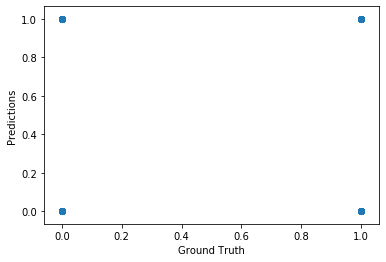

In [61]:
# Graficando los resultados
plt.scatter(y_test, predictions, alpha = 0.5) #, color=['blue','green'])
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();